<a href="https://colab.research.google.com/github/Andro2k/Metodos-Numericos/blob/main/Prueba_2_Andino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Minimos Cuadrados**

In [ ]:
from typing import Callable # Import the Callable type hint

# ####################################################################
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float]], tuple]], # Now Callable is defined
) -> None:
    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."
    n = len(xs)
    num_pars = len(gradiente)
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)
    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."
        Ab[i, :] = der_parcial(xs, ys)
    params, _, _, _ = np.linalg.lstsq(Ab[:, :-1], Ab[:, -1], rcond=None)
    return params

[ 2.02441048 -1.12332513 -0.63825562]


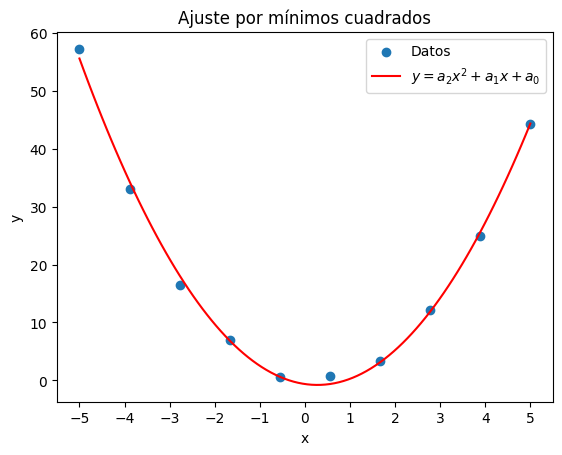

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Conjunto de datos 2
xs2 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys2 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

# Definición de nuevas derivadas parciales
def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(x**4 for x in xs)
    c_1 = sum(x**3 for x in xs)
    c_0 = sum(x**2 for x in xs)
    c_ind = sum(y * x**2 for x, y in zip(xs, ys))
    return c_2, c_1, c_0, c_ind

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(x**3 for x in xs)
    c_1 = sum(x**2 for x in xs)
    c_0 = sum(xs)
    c_ind = sum(y * x for x, y in zip(xs, ys))
    return c_2, c_1, c_0, c_ind

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(x**2 for x in xs)
    c_1 = sum(xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return c_2, c_1, c_0, c_ind

# Función de la parábola
def parabola(x: float, pars: tuple[float]) -> float:
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0

# Ajuste de los datos a una parábola
pars = ajustar_min_cuadrados(xs2, ys2, gradiente=[der_parcial_2, der_parcial_1, der_parcial_0])
print(pars) # parámetros de la curva ajustada

# Graficar la función cuadrática ajustada y los puntos dados
x = np.linspace(-5, 5, 100)
y = [parabola(xi, pars) for xi in x]

plt.scatter(xs2, ys2, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_2 x^2 + a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()

# Ajustar los ticks de los ejes
plt.xticks(np.arange(-5, 6, 1))  # De -5 a 5 con incrementos de 1 en 1
plt.yticks(np.arange(0, 70, 10))  # De 0 a 70 con incrementos de 10 en 10

plt.show()


# **Determinante**

In [65]:
import numpy as np

# Definir las matrices
A = np.array([
    [-4, 2, -4, -4, 1, 2, 5, 3, 5, 1],
    [1, 0, 4, 3, 0, -2, 3, 0, 1, 5],
    [5, 5, -4, 5, -4, 2, 2, 2, 4, 4],
    [-1, 3, 4, -1, -4, 0, 5, 0, 0, 5],
    [4, 1, 4, 2, 0, 0, 3, -1, 0, 2],
    [2, -2, 1, -1, -2, -3, 2, -2, 4, -1],
    [3, -2, -3, -2, -1, -3, 5, -1, 5, 0],
    [3, 4, -3, 3, -2, 2, -4, -4, 1, 5],
    [-4, 0, 3, 3, -3, -2, -2, 0, 5, -4],
    [-2, 4, 4, -2, -1, 1, 5, -1, 3, -3]
])

A2 = np.array([
    [2, 2, 4, 5, -2, -3, 2, -2],
    [-1, -1, 3, 2, 1, 1, -4, 4],
    [2, 5, -3, -3, -2, 2, 5, 3],
    [-2, -4, 0, 1, -1, 5, -4, -1],
    [1, -2, -1, 5, 5, 2, 1, -2],
    [5, 4, 0, 3, 4, -1, -3, -2],
    [4, -4, 1, 2, 3, 3, -1, 3],
    [-2, 1, -3, 0, 5, 4, 4, -4]
])

# Calcular los determinantes
detA = np.linalg.det(A)
detA2 = np.linalg.det(A2)

# Imprimir los resultados
print(f"detA = {detA:.9f}")
print(f"detA2 = {detA2:.9f}")

# Determinar el tipo de solución
def tipo_solucion(determinante):
    if determinante != 0:
        return "solución única"
    else:
        return "singular"

print(f"Tipo de solución del sistema con matriz A: {tipo_solucion(detA)}")
print(f"Tipo de solución del sistema con matriz A2: {tipo_solucion(detA2)}")


detA = 9912775.999999950
detA2 = 2341545.999999998
Tipo de solución del sistema con matriz A: solución única
Tipo de solución del sistema con matriz A2: solución única


In [64]:
import numpy as np
from scipy.linalg import lu, solve_triangular

def ingresar_matriz_filas(tamaño, nombre):
    matriz = np.zeros((tamaño, tamaño))
    print(f"Ingresar fila por fila los elementos de la matriz {nombre}:")
    for i in range(tamaño):
        fila = input(f"Fila {i+1} (separar elementos con espacios): ").split()
        matriz[i, :] = [float(num) for num in fila]
    return matriz

def ingresar_vector(tamaño):
    vector = np.zeros((tamaño, 1))
    print(f"Ingresar elementos del vector columna b (separar elementos con espacios):")
    elementos = input().split()
    vector[:, 0] = [float(num) for num in elementos]
    return vector

def calc_determinante(A):
    """Función que calcula el determinante usando el método
    de Descomposición LU.

    ## Parameters
    `A`: Matriz cuadrada de tamaño n x n

    ## Return
    `detA`: Determinante de la matriz A
    """
    # Descomponer la matriz A en P, L y U
    P, L, U = lu(A)

    # El determinante de A es el producto de los elementos en la diagonal de U
    detU = np.prod(np.diag(U))

    # El determinante de P es (-1)^k donde k es el número de permutaciones
    # Como P es una matriz de permutación, el determinante de P puede ser +1 o -1
    detP = np.linalg.det(P)

    detA = detP * detU
    return detA

def resolver_sistema():
    n = int(input("Ingrese el tamaño de la matriz (n x n): "))

    A = ingresar_matriz_filas(n, "A")
    b = ingresar_vector(n)

    print("\nMatriz A ingresada:")
    print(A)
    print("\nVector columna b ingresado:")
    print(b)

    # Calcular el determinante de A
    detA = calc_determinante(A)
    print(f"\nDeterminante de A: {detA}")

    if detA == 0:
        print("La matriz A es singular y no se puede resolver el sistema.")
        return

    # Descomposición LU
    P, L, U = lu(A)

    print("\nMatriz L resultante de la descomposición LU:")
    print(L)
    print("\nMatriz U resultante de la descomposición LU:")
    print(U)

    # Resolver Ly = Pb
    Pb = np.dot(P, b)
    y = solve_triangular(L, Pb, lower=True)
    print("\nSolución intermedia y del sistema Ly = Pb es:")
    print(y)

    # Resolver Ux = y
    x = solve_triangular(U, y)
    print("\nSolución final x del sistema Ux = y es:")
    print(x)

if __name__ == "__main__":
    resolver_sistema()


Ingrese el tamaño de la matriz (n x n): 4
Ingresar fila por fila los elementos de la matriz A:
Fila 1 (separar elementos con espacios): 1 1 -1 2
Fila 2 (separar elementos con espacios): 2   2   4   5
Fila 3 (separar elementos con espacios): 1   -1  1   7
Fila 4 (separar elementos con espacios): 2   3   4   6
Ingresar elementos del vector columna b (separar elementos con espacios):
1 1 1 1

Matriz A ingresada:
[[ 1.  1. -1.  2.]
 [ 2.  2.  4.  5.]
 [ 1. -1.  1.  7.]
 [ 2.  3.  4.  6.]]

Vector columna b ingresado:
[[1.]
 [1.]
 [1.]
 [1.]]

Determinante de A: 40.0

Matriz L resultante de la descomposición LU:
[[ 1.          0.          0.          0.        ]
 [ 0.5         1.          0.          0.        ]
 [ 0.5        -0.          1.          0.        ]
 [ 1.         -0.5         0.16666667  1.        ]]

Matriz U resultante de la descomposición LU:
[[ 2.          2.          4.          5.        ]
 [ 0.         -2.         -1.          4.5       ]
 [ 0.          0.         -3.   

In [ ]:
calc_determinante(A)

# **Gauss-Jacobi y Gauss-Seidel**

Ingresa el número de ecuaciones: 2
Ingresa los coeficientes de la matriz A de tamaño 2x2:
Fila 1: 1 1
Fila 2: -2 5
Ingresa el vector de constantes b:
7 0
Selecciona el método:
1: Gauss-Jacobi
2: Gauss-Seidel
1
Método de Gauss-Jacobi seleccionado.
Convergió en 4 iteraciones.
|-kth-| x1 | x2 |
| --- | --- | --- |
| 0 | 0.00000 | 0.00000 |
| 1 | 7.00000 | 0.00000 |
| 2 | 7.00000 | 2.00000 |
| 3 | 5.00000 | 2.00000 |
| 4 | 5.00000 | 2.00000 |



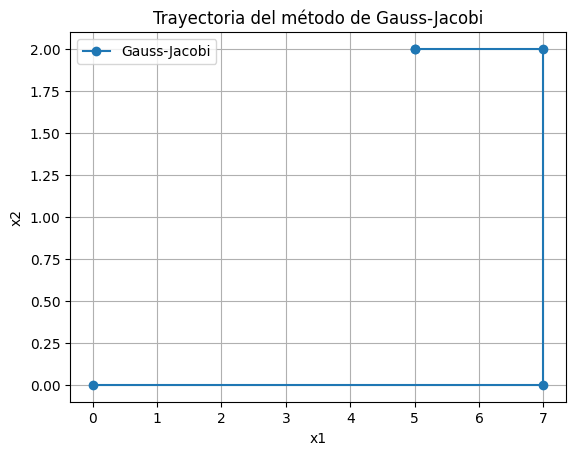

Solución:
x1 = 5.0000000000
x2 = 2.0000000000


In [68]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_jacobi(a, b, x0, tolerancia, max_iteraciones):
    n = len(a)
    x = np.array(x0)
    iteraciones = [x.copy()]

    for k in range(max_iteraciones):
        x_new = np.copy(x)
        for i in range(n):
            suma = sum(a[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - suma) / a[i][i]
        iteraciones.append(x_new.copy())

        # Comprobar convergencia
        if np.all(np.abs(x_new - x) < tolerancia):
            print(f'Convergió en {k + 1} iteraciones.')
            mostrar_tabla_markdown(iteraciones)
            plot_trajectory(np.array(iteraciones), 'Gauss-Jacobi')
            return x_new
        x = x_new
    print('No convergió dentro del número máximo de iteraciones.')
    mostrar_tabla_markdown(iteraciones)
    plot_trajectory(np.array(iteraciones), 'Gauss-Jacobi')
    return x

def gauss_seidel(a, b, x0, tolerancia, max_iteraciones):
    n = len(a)
    x = np.array(x0)
    iteraciones = [x.copy()]

    for k in range(max_iteraciones):
        x_old = np.copy(x)
        for i in range(n):
            suma = sum(a[i][j] * x[j] for j in range(n) if j != i)
            x[i] = (b[i] - suma) / a[i][i]
        iteraciones.append(x.copy())

        # Comprobar convergencia
        if np.all(np.abs(x - x_old) < tolerancia):
            print(f'Convergió en {k + 1} iteraciones.')
            mostrar_tabla_markdown(iteraciones)
            plot_trajectory(np.array(iteraciones), 'Gauss-Seidel')
            return x
    print('No convergió dentro del número máximo de iteraciones.')
    mostrar_tabla_markdown(iteraciones)
    plot_trajectory(np.array(iteraciones), 'Gauss-Seidel')
    return x

def mostrar_tabla_markdown(iteraciones):
    n = len(iteraciones[0])
    tabla = "|-kth-| " + " | ".join([f"x{i+1}" for i in range(n)]) + " |\n"
    tabla += "| --- " * (n + 1) + "|\n"
    for k, xk in enumerate(iteraciones):
        tabla += f"| {k} | " + " | ".join([f"{xi:.5f}" for xi in xk]) + " |\n"
    print(tabla)

def plot_trajectory(trajectory, method_name):
    plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', linestyle='-', label=f'{method_name}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Trayectoria del método de {method_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

def ingresar_matrices_y_vector(n):
    print(f'Ingresa los coeficientes de la matriz A de tamaño {n}x{n}:')
    a = []
    for i in range(n):
        while True:
            fila = list(map(float, input(f'Fila {i + 1}: ').split()))
            if len(fila) == n:
                break
            print(f'Error: La fila debe contener {n} elementos.')
        a.append(fila)
    print('Ingresa el vector de constantes b:')
    while True:
        b = list(map(float, input().split()))
        if len(b) == n:
            break
        print(f'Error: El vector debe contener {n} elementos.')
    return a, b

def main():
    n = int(input('Ingresa el número de ecuaciones: '))
    a, b = ingresar_matrices_y_vector(n)

    x0 = [0] * n  # Estimación inicial
    tolerancia = 1e-10
    max_iteraciones = 1000

    print('Selecciona el método:')
    print('1: Gauss-Jacobi')
    print('2: Gauss-Seidel')
    metodo = int(input())

    if metodo == 1:
        print('Método de Gauss-Jacobi seleccionado.')
        solucion = gauss_jacobi(a, b, x0, tolerancia, max_iteraciones)
    elif metodo == 2:
        print('Método de Gauss-Seidel seleccionado.')
        solucion = gauss_seidel(a, b, x0, tolerancia, max_iteraciones)
    else:
        print('Método no reconocido.')
        return

    print('Solución:')
    for i in range(n):
        print(f'x{i + 1} = {solucion[i]:.10f}')

if __name__ == "__main__":
    main()
